# Predicting closing price using a multi variable Linear regression model

# Import the needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import our Shiba inu data file

In [2]:
df = pd.read_csv('./desktop/SHIB-USD.csv', index_col = 'Date', parse_dates= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-14,0.000029,0.000030,0.000027,0.000027,0.000027,2727081948
2021-10-15,0.000027,0.000027,0.000023,0.000025,0.000025,4121246428
2021-10-16,0.000025,0.000027,0.000025,0.000026,0.000026,1871226740
2021-10-17,0.000026,0.000029,0.000024,0.000028,0.000028,2304858857
2021-10-18,0.000028,0.000030,0.000026,0.000029,0.000029,3919367323


# Check that there are no null columns

In [3]:
nandf = df[df.isna().any(axis= 1)]
nandf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


# Create EMA 10, 20 columns for shiba opening prices

In [16]:
df['EMA10'] = df['Open'].ewm(span=10).mean()


In [17]:
df['EMA20'] = df['Open'].ewm(span=20).mean()

# Find the strongest correlation

In [19]:
corr_df = df.corr()

In [20]:
corr_df

,Open,High,Low,Close,Adj Close,Volume,Price_pred,EMA10,EMA20
Open,1.000000,0.984873,0.990047,0.979596,0.979596,0.565689,0.982192,0.968096,0.942800
High,0.984873,1.000000,0.980121,0.993912,0.993912,0.671046,0.996546,0.947508,0.921052
Low,0.990047,0.980121,1.000000,0.986136,0.986136,0.530085,0.988749,0.970611,0.949386
Close,0.979596,0.993912,0.986136,1.000000,1.000000,0.635300,0.997357,0.950651,0.926551
Adj Close,0.979596,0.993912,0.986136,1.000000,1.000000,0.635300,0.997357,0.950651,0.926551
Volume,0.565689,0.671046,0.530085,0.635300,0.635300,1.000000,0.636848,0.441647,0.398742
Price_pred,0.982192,0.996546,0.988749,0.997357,0.997357,0.636848,1.000000,0.952995,0.929105
EMA10,0.968096,0.947508,0.970611,0.950651,0.950651,0.441647,0.952995,1.000000,0.992577
EMA20,0.942800,0.921052,0.949386,0.926551,0.926551,0.398742,0.929105,0.992577,1.000000


# Using Sklearn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assign values to our X and Y variables

In [22]:
X = df[['Open', 'EMA10', 'EMA20']]
Y = df['Close']

# Create model

In [23]:
reg = LinearRegression()

In [24]:
reg = reg.fit(X, Y)

# Finding our M- Coefficient and C - Intercept

In [25]:
print('M =', reg.coef_)
print('C =', reg.intercept_)

M = [0.94528367 0.03124986 0.00572952]
C = 3.3296511245381114e-07


# Making Price predictions

In [26]:
Y_pred = reg.predict(X)
Y_pred = Y_pred.astype('str')


In [27]:
df['Price_pred'] = pd.to_numeric(Y_pred)
df

,Open,High,Low,Close,Adj Close,Volume,Price_pred,EMA10,EMA20
Date,,,,,,,,,
2021-10-14,0.000029,0.000030,0.000027,0.000027,0.000027,2727081948,0.000029,0.000029,0.000029
2021-10-15,0.000027,0.000027,0.000023,0.000025,0.000025,4121246428,0.000027,0.000028,0.000028
2021-10-16,0.000025,0.000027,0.000025,0.000026,0.000026,1871226740,0.000025,0.000027,0.000027
2021-10-17,0.000026,0.000029,0.000024,0.000028,0.000028,2304858857,0.000026,0.000026,0.000027
2021-10-18,0.000028,0.000030,0.000026,0.000029,0.000029,3919367323,0.000028,0.000027,0.000027
...,...,...,...,...,...,...,...,...,...
2022-10-10,0.000011,0.000011,0.000010,0.000010,0.000010,192456230,0.000011,0.000011,0.000011
2022-10-11,0.000010,0.000010,0.000010,0.000010,0.000010,225078484,0.000010,0.000011,0.000011
2022-10-12,0.000010,0.000010,0.000010,0.000010,0.000010,128040822,0.000010,0.000011,0.000011


In [28]:
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:96: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


In [29]:
print(r2_score)
print(np.sqrt(mse))

0.9596936206838471
2.698154130499395e-06


<AxesSubplot:xlabel='Date'>

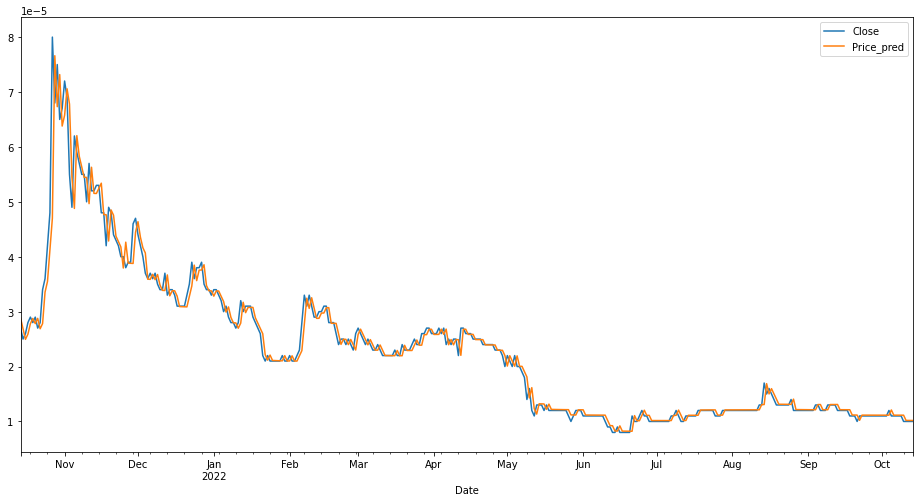

In [30]:
df[['Close', 'Price_pred']].plot(label = 'SHIB M.A', figsize = (16, 8))